Multiple Linear Regression

Training Dataset

In [229]:
import pandas as pd

pizza1 = {
    "diameter":[6, 8, 10, 14, 18],
    "topping":[2, 0, 4, 3, 5],
    "price(USD)":[9, 10.55, 12.75, 15.32, 19.45]
}

pizzaTrainDf = pd.DataFrame(pizza1)

Testing Dataset

In [230]:

pizza2 = {
    "diameter": [8, 9, 11, 16, 12],
    "topping": [3, 2, 0, 2, 4],
    "price(USD)": [11.25, 12, 11, 16.89, 14.85]
}

pizzaTestDf = pd.DataFrame(pizza2)

Dataset Splitting

In [231]:
import numpy as np

X_train = np.array(pizzaTrainDf[["diameter", "topping"]])
y_train = np.array(pizzaTrainDf["price(USD)"])

In [232]:
X_test = np.array(pizzaTestDf[["diameter", "topping"]])
y_test = np.array(pizzaTestDf["price(USD)"])

Training Model

In [233]:
from sklearn.linear_model import LinearRegression
lnModel = LinearRegression()
lnModel.fit(X_train, y_train)

LinearRegression()

Evaluate Model

In [234]:
from sklearn.metrics import r2_score as r2
yPred = lnModel.predict(X_test)
predScore = r2(y_test, yPred)
print(f"Prediciton Score (R2): {predScore}")
yPred

Prediciton Score (R2): 0.8512566586141738


array([10.875     , 11.5075    , 12.7725    , 17.13666667, 14.26333333])

Polynomial Regression: Quadratic

Formula: α + β₁X + βX²

Data Splitting

In [235]:
X_train2 = np.array(pizzaTrainDf["diameter"]).reshape(-1, 1)
y_train2 = np.array(pizzaTrainDf["price(USD)"])

X_test2 = np.array(pizzaTestDf["diameter"]).reshape(-1, 1)
y_test2 = np.array(pizzaTestDf["price(USD)"])

Prepocessing Dataset & Training Model

In [236]:
from sklearn.preprocessing import PolynomialFeatures
quadratic = PolynomialFeatures(degree=2)
X_trainQuad = quadratic.fit_transform(X_train2)

In [237]:
lnModel2 = LinearRegression()
lnModel2.fit(X_trainQuad, y_train2)

LinearRegression()

Evaluate Polynomial Regression Model 

In [238]:
X_testQuad = quadratic.fit_transform(X_test2)
yPred2 = lnModel2.predict(X_testQuad)

predScore2 = r2(y_test2, yPred2)
print(f"Polynomial Prediction Score (R2): {predScore2}")

Polynomial Prediction Score (R2): 0.7623767624115708


Data Visualisation

(0.0, 25.0)

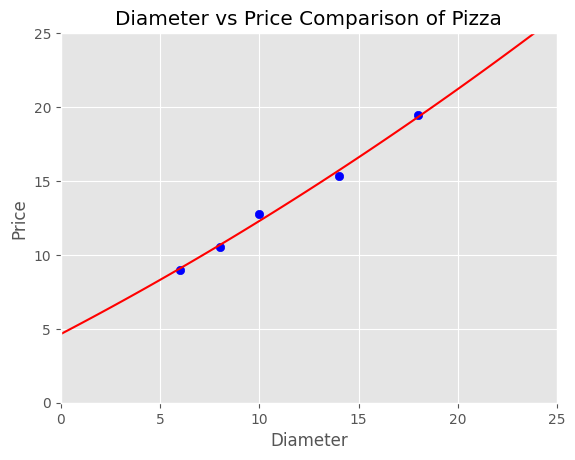

In [260]:
import matplotlib.pyplot as plt

plt.style.use("ggplot")

X_vis = np.linspace(0, 25, 100).reshape(-1, 1)
X_visQuad = quadratic.transform(X_vis)
y_visQuad = lnModel2.predict(X_visQuad)

plt.scatter(X_train2, y_train2, color="blue")
plt.plot(X_vis, y_visQuad, '-r')

plt.title("Diameter vs Price Comparison of Pizza")
plt.xlabel("Diameter")
plt.ylabel("Price")
plt.xlim(0, 25)
plt.ylim(0, 25)


In [261]:
pizza1 = {
    "diameter": [6, 8, 10, 14, 18, 7, 9, 12, 16, 11, 13, 15, 17, 19, 20],
    "topping": [2, 0, 4, 3, 5, 1, 2, 3, 4, 1, 3, 2, 4, 5, 2],
    "price(USD)": [9.00, 10.55, 12.75, 15.32, 19.45,
                   9.80, 11.20, 13.80, 16.50, 12.10,
                   14.75, 15.90, 17.65, 20.10, 20.80]
}

pizzaTrainDf = pd.DataFrame(pizza1)

X_train3 = np.array(pizzaTrainDf["diameter"]).reshape(-1, 1)
y_train3 = np.array(pizzaTrainDf["price(USD)"])


Data Visulisation of Quadratic vs Cubic Polynomial 

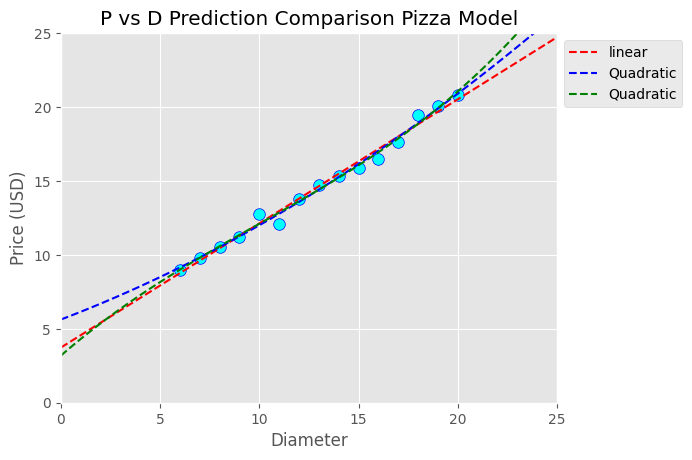

In [264]:
# Linear
lnModelA = LinearRegression()
lnModelA.fit(X_train3, y_train3)
X_visA = np.linspace(0, 25, 100).reshape(-1, 1)
y_visB = lnModelA.predict(X_vis)
plt.plot(X_visA, y_visB, "--r", label="linear")

# Quadratic
quadratic = PolynomialFeatures(degree=2)
X_trainQ = quadratic.fit_transform(X_train3)
lnModelB = LinearRegression()
lnModelB.fit(X_trainQ, y_train3)
X_visB = np.linspace(0, 25, 100).reshape(-1, 1)
X_visB_quad = quadratic.fit_transform(X_visB)
y_visB = lnModelB.predict(X_visB_quad)
plt.plot(X_visB, y_visB, "--b", label="Quadratic")

# Cubic
cubic = PolynomialFeatures(degree=3)
X_trainC = cubic.fit_transform(X_train3)
lnModelC = LinearRegression()
lnModelC.fit(X_trainC, y_train3)
X_visC = np.linspace(0, 25, 100).reshape(-1, 1)
X_visC_quad = cubic.fit_transform(X_visC)
y_visC = lnModelC.predict(X_visC_quad)
plt.plot(X_visC, y_visC, "--g", label="Quadratic")


plt.title("Comparison P vs D of Pizza Prediction Model")
plt.xlabel("Diameter")
plt.ylabel("Price (USD)")
plt.legend(bbox_to_anchor=(1, 1))
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.scatter(X_train3, y_train3, color="cyan", edgecolors="blue", s=70)